# Author

Daniel Soto

# Introduction

This notebook calculates the marginal fuel rates for each of the generators in the generator data set.
It also estimates the no-load fuel consumption for each of the generators.

Once these are calculated, we take the means of each to create a single generator model over the range of the Sentani generators.

# Method


# Results

- marginal fuel rate over all generators is 0.256 liters per hour per additional kVA
- no-load fuel consumption is 1.39 liters per hour
- all generators had r-squared values above 0.98

# Next Work

In [1]:
%load_ext autoreload

In [2]:
%autoreload 2
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import WP19_analysis as wpa
import statsmodels.api as sm

/Users/dsoto/anaconda/envs/wp19/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
# load data and add a column for the delivered load in kVA rather than a percentage

gen_data = pd.read_csv('../data_sheets/generator_data.csv', comment='#')
gen_data['load_kVA'] = gen_data['rated_power_kVA'] * gen_data['percent_load'] / 100
gen_data.head()

,manufacturer,model_number,rated_power_kVA,percent_load,fuel_consumption_lph,load_kVA
0,kohler,20REOZK 4D5.0,25.0,100,7.2,25.00
1,kohler,20REOZK 4D5.0,25.0,75,5.7,18.75
2,kohler,20REOZK 4D5.0,25.0,50,3.8,12.50
3,kohler,20REOZK 4D5.0,25.0,25,2.3,6.25
4,kohler,30REOZK 4D8.3,35.0,100,9.1,35.00


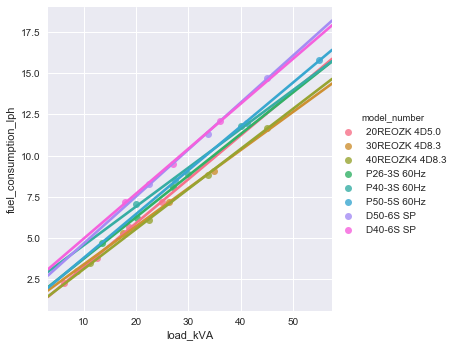

In [4]:
# here is a plot with all of the curves
sns.lmplot('load_kVA', 'fuel_consumption_lph', 
           data=gen_data, 
           hue='model_number',
           #hue='rated_power_kVA',
           fit_reg=True,
           ci=None)

In [5]:
# iterate over each model and perform a fit and show table of results

generator_fits = []
models = gen_data['model_number'].unique()
for m in models:
    model_data = gen_data[gen_data['model_number'] == m]
    y = model_data['fuel_consumption_lph']
    X = model_data['load_kVA']
    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()
    generator_fits.append({'model': m,
                           'rated_power_kVA':model_data['rated_power_kVA'].mean(), 
                           'no_load_consumption': model.params['const'],
                           'fuel_coefficient': model.params['load_kVA'],
                           'R-squared': model.rsquared})
    
generator_fits = pd.DataFrame(generator_fits)
generator_fits

,R-squared,fuel_coefficient,model,no_load_consumption,rated_power_kVA
0,0.997683,0.265600,20REOZK 4D5.0,0.600000,25.0
1,0.997653,0.230857,30REOZK 4D8.3,1.100000,35.0
2,0.999383,0.242667,40REOZK4 4D8.3,0.700000,45.0
3,0.995408,0.251852,P26-3S 60Hz,1.233333,27.0
4,0.982069,0.235000,P40-3S 60Hz,2.216667,40.0
5,0.999437,0.265455,P50-5S 60Hz,1.150000,55.0
6,0.998700,0.284444,D50-6S SP,1.833333,45.0
7,0.998752,0.272222,D40-6S SP,2.250000,36.0


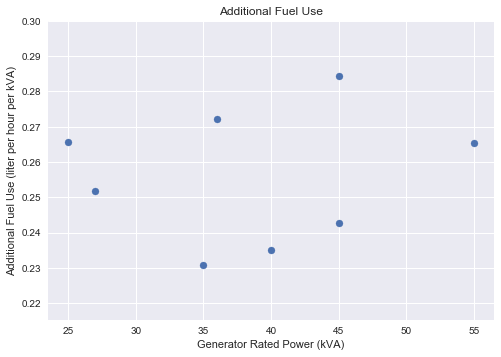

In [6]:
# try out plt.scatter('x', 'y', data=data)

plt.scatter('rated_power_kVA', 'fuel_coefficient', data=generator_fits)
plt.title('Additional Fuel Use')
plt.xlabel('Generator Rated Power (kVA)')
plt.ylabel('Additional Fuel Use (liter per hour per kVA)')
plt.show()

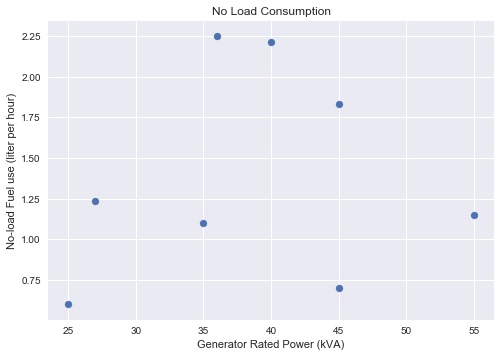

In [7]:
plt.scatter('rated_power_kVA', 'no_load_consumption', data=generator_fits)
plt.title('No Load Consumption')
plt.xlabel('Generator Rated Power (kVA)')
plt.ylabel('No-load Fuel use (liter per hour)')
plt.show()

In [8]:
generator_fits['fuel_coefficient'].mean()

0.25601210918710926

In [9]:
generator_fits['no_load_consumption'].mean()

1.385416666666665